In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_log_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('ready_data.csv')
data_test = pd.read_csv('ready_data_test.csv')

answer = pd.DataFrame()
answer['Id'] = data_test['Id']
del data_test['Id']

y = data['SalePrice']
del data['SalePrice']

## Feature Selection

In [4]:
reg = LassoCV(alphas = np.logspace(-1,4,25))
reg.fit(data, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(data,y))

coef = pd.Series(reg.coef_, index = data.columns)

Best alpha using built-in LassoCV: 215.443469
Best score using built-in LassoCV: 0.907942


In [5]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y, reg.predict(data)))

0.1256107270897599

Text(0.5, 1.0, 'Feature importance using Lasso Model')

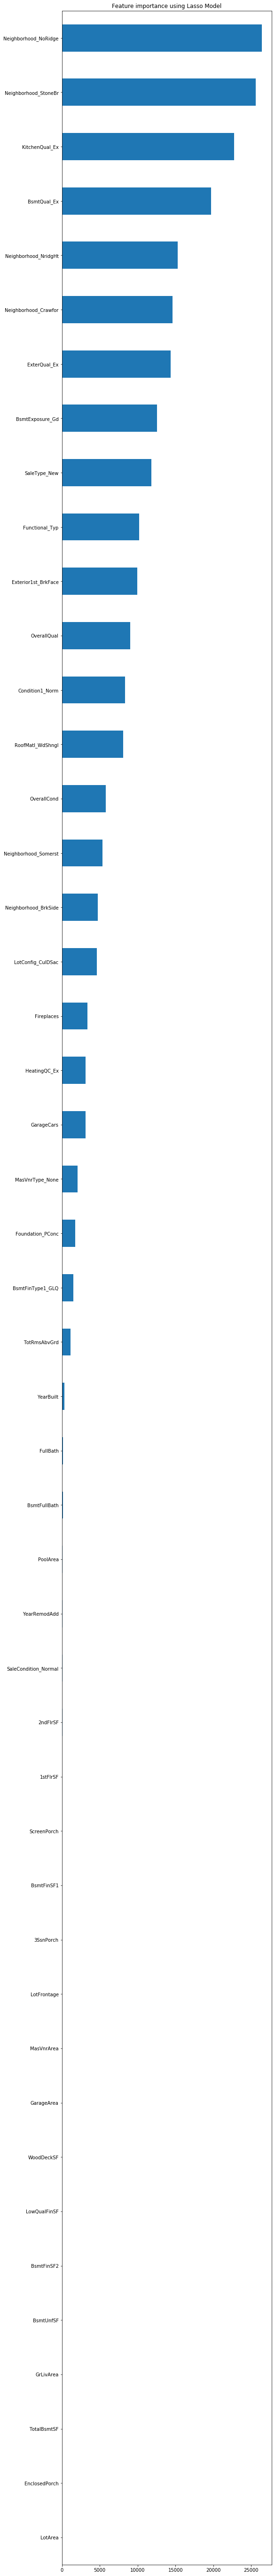

In [6]:
imp_coef = coef.loc[coef > 0].sort_values()
import matplotlib

matplotlib.rcParams['figure.figsize'] = (8.0, 100.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [7]:
for col in coef.keys():
    if(coef[col] < 0):
        del data[col]
        del data_test[col]

## Модель №2 с Feature Selection: 0.14766 public score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=7)

In [9]:
from sklearn.linear_model import Ridge
import numpy as np

clf = LassoCV(alphas = np.logspace(-1,4,25))

clf.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-01, 1.61559810e-01, 2.61015722e-01, 4.21696503e-01,
       6.81292069e-01, 1.10069417e+00, 1.77827941e+00, 2.87298483e+00,
       4.64158883e+00, 7.49894209e+00, 1.21152766e+01, 1.95734178e+01,
       3.16227766e+01, 5.10896977e+01, 8.25404185e+01, 1.33352143e+02,
       2.15443469e+02, 3.48070059e+02, 5.62341325e+02, 9.08517576e+02,
       1.46779927e+03, 2.37137371e+03, 3.83118685e+03, 6.18965819e+03,
       1.00000000e+04]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [10]:
np.sqrt(mean_squared_log_error(y_test, clf.predict(X_test)))

0.13064914986803344

In [11]:
result = pd.DataFrame()

In [12]:
result['Id'] = answer['Id']
result['SalePrice'] = clf.predict(data_test)

In [13]:
result.to_csv('out_2.csv', index=False, header=True)

## Strong Feature Selection

In [19]:
data = pd.read_csv('ready_data.csv')
data_test = pd.read_csv('ready_data_test.csv')

answer = pd.DataFrame()
answer['Id'] = data_test['Id']
del data_test['Id']

y = data['SalePrice']
del data['SalePrice']

In [20]:
for col in coef.keys():
    if(coef[col] <= 0):
        del data[col]
        del data_test[col]

#### Корреляция

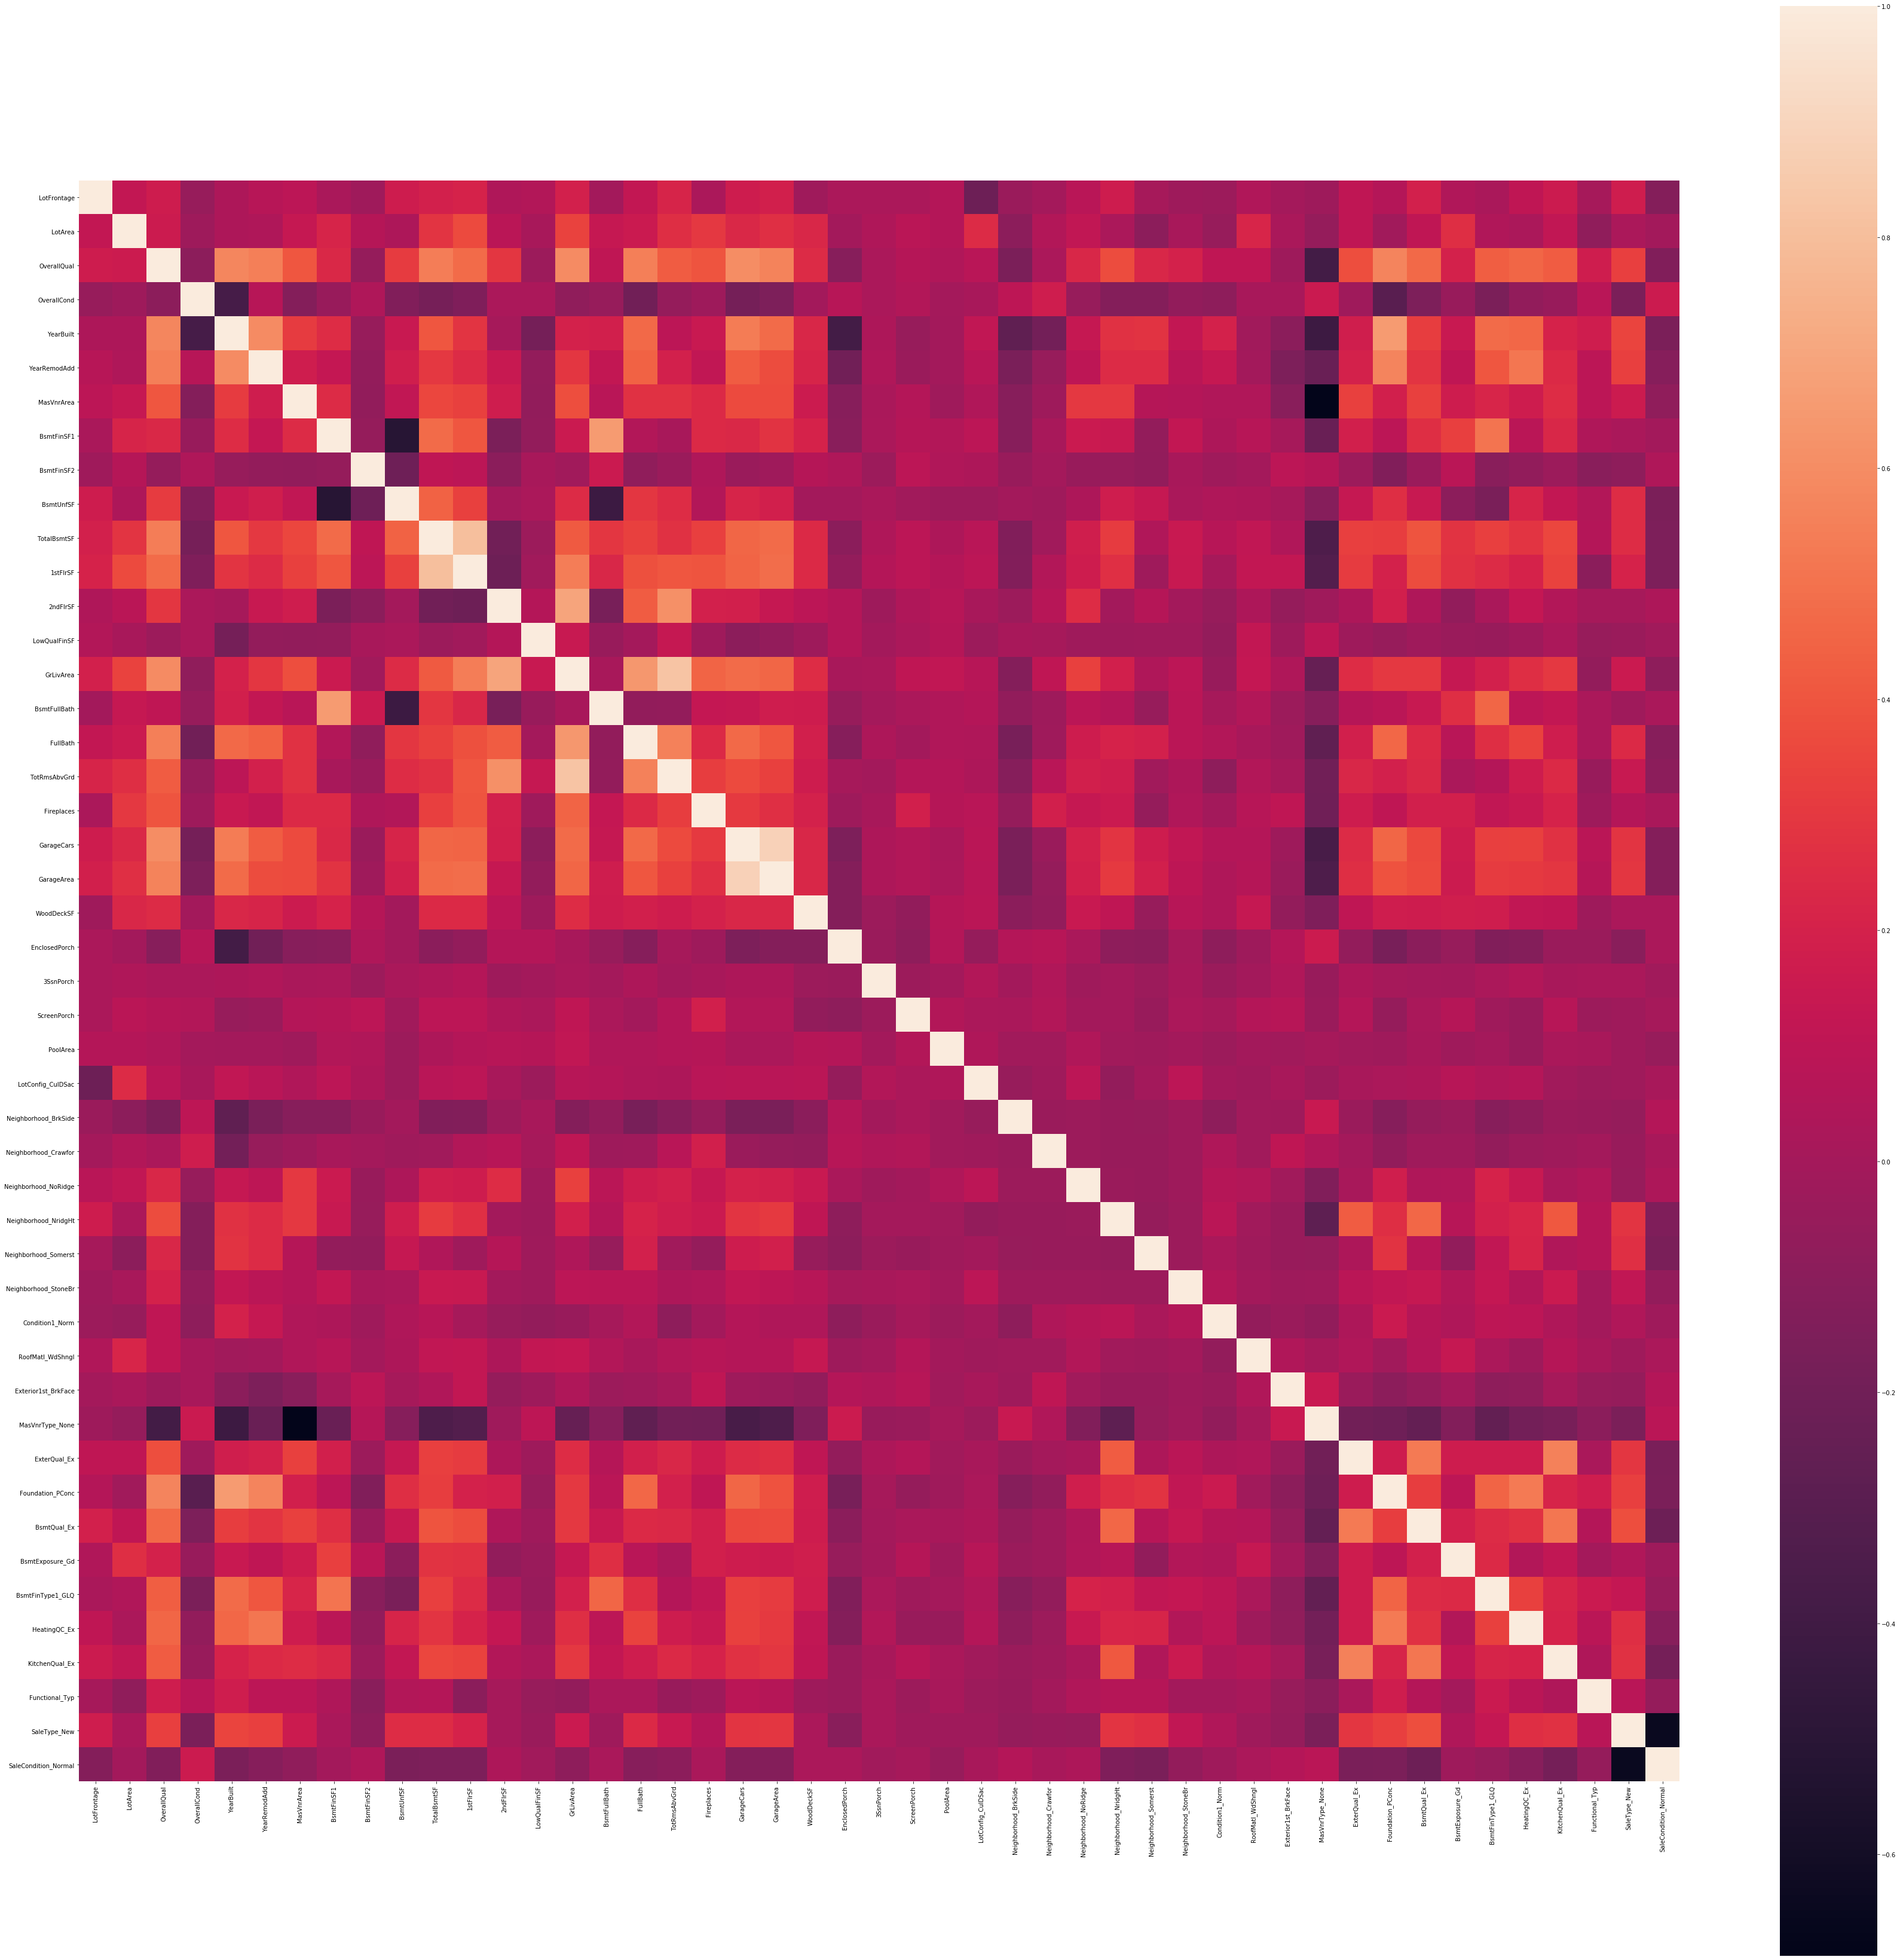

In [21]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(60, 60))
# sns.set(font_scale=0.3) 
sns.heatmap(corrmat, square=True);

In [22]:
del data['GarageCars']
del data_test['GarageCars']

## Модель №3 c Strong Feature Selection: 0.33128 public score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=7)

In [24]:
from sklearn.linear_model import Ridge
import numpy as np

clf = LassoCV(alphas = np.logspace(-1,4,25))

clf.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-01, 1.61559810e-01, 2.61015722e-01, 4.21696503e-01,
       6.81292069e-01, 1.10069417e+00, 1.77827941e+00, 2.87298483e+00,
       4.64158883e+00, 7.49894209e+00, 1.21152766e+01, 1.95734178e+01,
       3.16227766e+01, 5.10896977e+01, 8.25404185e+01, 1.33352143e+02,
       2.15443469e+02, 3.48070059e+02, 5.62341325e+02, 9.08517576e+02,
       1.46779927e+03, 2.37137371e+03, 3.83118685e+03, 6.18965819e+03,
       1.00000000e+04]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [25]:
np.sqrt(mean_squared_log_error(y_test, clf.predict(X_test)))

0.15424277681504261

In [26]:
result = pd.DataFrame()

In [27]:
result['Id'] = answer['Id']
result['SalePrice'] = clf.predict(data_test)

In [28]:
result.to_csv('out_3.csv', index=False, header=True)

## Модель №4: 0.14235 score

Вернемся к 1 модели с максимально полным набором данных и попробуем взять модель с другими параметрами

In [77]:
data = pd.read_csv('ready_data.csv')
data_test = pd.read_csv('ready_data_test.csv')

answer = pd.DataFrame()
answer['Id'] = data_test['Id']
del data_test['Id']

y = data['SalePrice']
del data['SalePrice']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=7)

In [123]:
from sklearn.linear_model import Ridge
import numpy as np

clf = LassoCV(alphas = np.logspace(-1, 4,25), normalize = True, tol=1e-2)

clf.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-01, 1.61559810e-01, 2.61015722e-01, 4.21696503e-01,
       6.81292069e-01, 1.10069417e+00, 1.77827941e+00, 2.87298483e+00,
       4.64158883e+00, 7.49894209e+00, 1.21152766e+01, 1.95734178e+01,
       3.16227766e+01, 5.10896977e+01, 8.25404185e+01, 1.33352143e+02,
       2.15443469e+02, 3.48070059e+02, 5.62341325e+02, 9.08517576e+02,
       1.46779927e+03, 2.37137371e+03, 3.83118685e+03, 6.18965819e+03,
       1.00000000e+04]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.01,
        verbose=False)

In [124]:
np.sqrt(mean_squared_log_error(y_test, clf.predict(X_test)))

0.12081194268082396

In [125]:
result = pd.DataFrame()

In [126]:
result['Id'] = answer['Id']
result['SalePrice'] = clf.predict(data_test)

In [127]:
result.to_csv('out_4.csv', index=False, header=True)